In [1]:
%matplotlib inline

###
[SWE3052-41] Project#1 Training a CNN Classifier
=====================

Due date: 05/07/2024 (11:59 PM)

In this project, we will learn different ways of learning CNN models and visualizing CNN filters. This homework is divided into three parts:

(PART 1) Implementing a CNN model (10 points)

(PART 2) Visualizing CNN filters (10 points)

(PART 3) Improving the CNN model  (10 points)

What about data?
----------------


For this homework, we will use the CIFAR10 dataset.
It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.


(PART 1) Training an image classifier (10 points)
----------------------------

We will do the following steps in order:

1. Load and normalizing the CIFAR10 training and test datasets using
   ``torchvision``   
2. Define a Convolution Neural Network [Your homework is here]
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

1. Loading and normalizing CIFAR10


Using ``torchvision``, it’s extremely easy to load CIFAR10.


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

print (torch.__version__)

2.2.1+cu121


The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:13<00:00, 12576203.39it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Let us show some of the training images, for fun.



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


 frog  frog horse plane


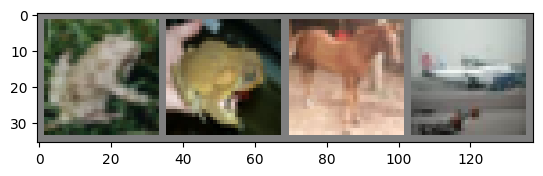

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


2. Define a Convolution Neural Network (You need to define here) (10 points)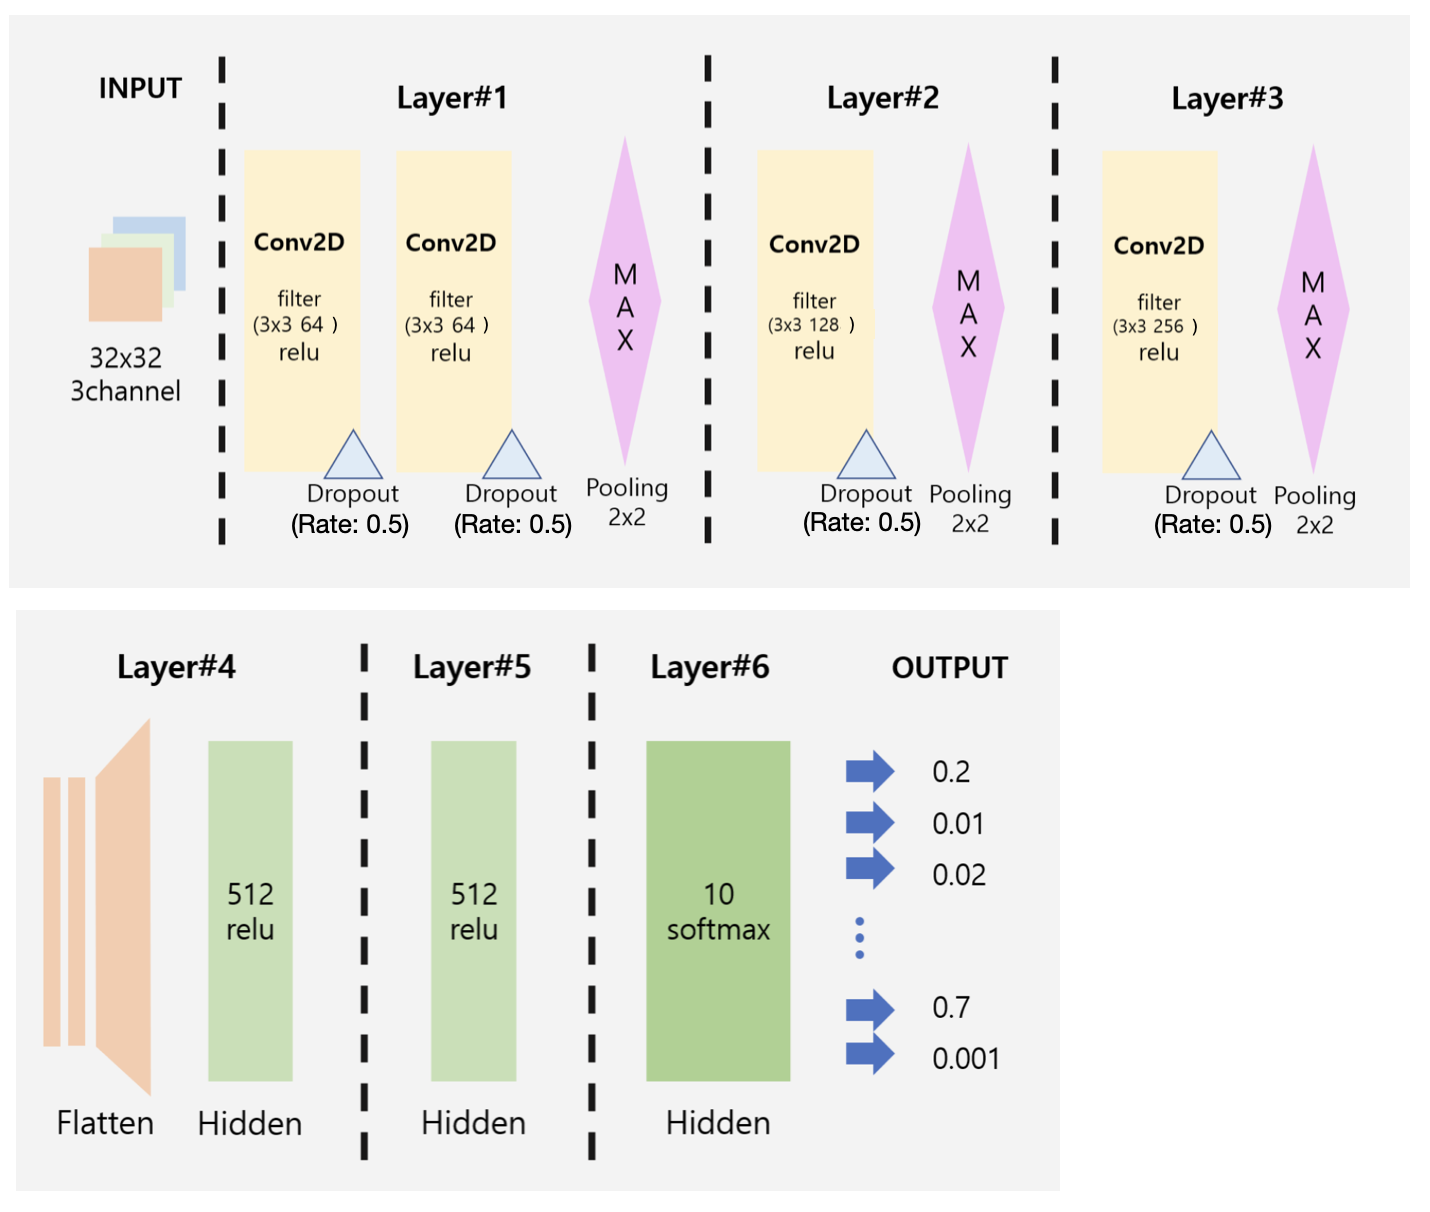


---






In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Layer1
        self.conv1_1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1) #first convolution block
        self.conv1_2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1) #second convolution block
        self.dropout1 = nn.Dropout(0.5) #dropout rate = 0.5
        self.pooling1 = nn.MaxPool2d(kernel_size=2, stride=2) #Maxpooling

        # Layer2
        self.conv2_1 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.dropout2 = nn.Dropout(0.5)
        self.pooling2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Layer3
        self.conv3_1 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.dropout3 = nn.Dropout(0.5)
        self.pooling3 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Flattening the output for the fclayer
        self.flatten = nn.Flatten()

        # First fclayer
        self.fc1 = nn.Linear(in_features=256*4*4, out_features=512)

        # Second fclayer
        self.fc2 = nn.Linear(in_features=512, out_features=512)

        # Third fclayer, output size = 10 (same as number of class labels)
        self.fc3 = nn.Linear(in_features=512, out_features=10)

    def forward(self, x):
        # forward through layer 1
        x = self.pooling1(self.dropout1(F.relu(self.conv1_2(F.relu(self.conv1_1(x))))))

        # forward through layer 2
        x = self.pooling2(self.dropout2(F.relu(self.conv2_1(x))))

        # forward through Layer 3
        x = self.pooling3(self.dropout3(F.relu(self.conv3_1(x))))

        # Flatten the output
        x = self.flatten(x)

        # Pass through the fc layers
        x = F.relu(self.fc1(x)) #Apply ReLU function
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        # Apply softmax on the output layer (for classification)
        x = F.softmax(x, dim=1)

        return x


net = Net()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)


Net(
  (conv1_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout1): Dropout(p=0.5, inplace=False)
  (pooling1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout2): Dropout(p=0.5, inplace=False)
  (pooling2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3_1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout3): Dropout(p=0.5, inplace=False)
  (pooling3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=4096, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)

3. Define a Loss function and optimizer.
Let's use a Classification Cross-Entropy loss and SGD with momentum.



In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

4. Train the network

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.




I have adapted the given code to include early stopping.

It still outputs the loss every 2000 mini-batches, just as before.

In [ ]:
import numpy as np

#initializing for early stopping
best_loss = np.inf
patience = 3
trigger_times = 0

for epoch in range(50):  # loop over the dataset multiple times. You can increase if you want.

    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()

        if i%2000 == 1999:
            epoch_loss = running_loss / 2000
            print('[%d, %5d] loss: %.3f' %  (epoch + 1, i + 1, epoch_loss))
            running_loss = 0.0
            break

    # Early stopping condition checking
    if epoch_loss < best_loss:
        best_loss = epoch_loss
        trigger_times = 0
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("Early stopping")
            break


print('Finished Training')

[1,  2000] loss: 2.302
[2,  2000] loss: 2.283
[3,  2000] loss: 2.198
[4,  2000] loss: 2.164
[5,  2000] loss: 2.140
[6,  2000] loss: 2.114
[7,  2000] loss: 2.097
[8,  2000] loss: 2.086
[9,  2000] loss: 2.065
[10,  2000] loss: 2.048
[11,  2000] loss: 2.040
[12,  2000] loss: 2.035
[13,  2000] loss: 2.038
[14,  2000] loss: 2.021
[15,  2000] loss: 2.023
[16,  2000] loss: 2.004
[17,  2000] loss: 2.017
[18,  2000] loss: 2.001
[19,  2000] loss: 1.992
[20,  2000] loss: 1.985
[21,  2000] loss: 1.981
[22,  2000] loss: 1.994
[23,  2000] loss: 1.967
[24,  2000] loss: 1.965
[25,  2000] loss: 1.973
[26,  2000] loss: 1.987
[27,  2000] loss: 1.966
Early stopping
Finished Training


5. Test the network on the test data

We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.



GroundTruth:    cat  ship  ship plane


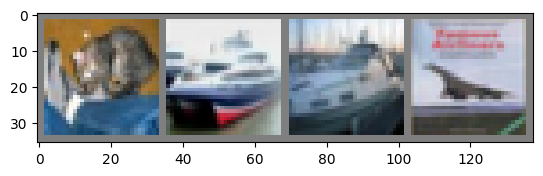

In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Okay, now let us see what the neural network thinks these examples above are:



In [ ]:
images = images.to(device)
outputs = net(images)

The outputs are energies for the 10 classes.
Higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    dog  ship  ship plane


The results seem pretty good.

Let us look at how the network performs on the whole dataset.



In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 43 %


That looks waaay better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.

What are the classes that performed well, and the classes that did
not perform well:



In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 63 %
Accuracy of   car : 57 %
Accuracy of  bird : 37 %
Accuracy of   cat :  3 %
Accuracy of  deer : 23 %
Accuracy of   dog : 85 %
Accuracy of  frog : 37 %
Accuracy of horse : 42 %
Accuracy of  ship : 35 %
Accuracy of truck : 48 %


The performance was obviously better than a model that had not been trained at all, but it's hard to say that it had good accuracy.


(PART 2) Visualizing your CNN filters (10 points)
----------------
Please visualize (randomly chosen) 5 convolutional filters of 1, 2, 3, 4 th conv layer after training. Please provide your analysis.



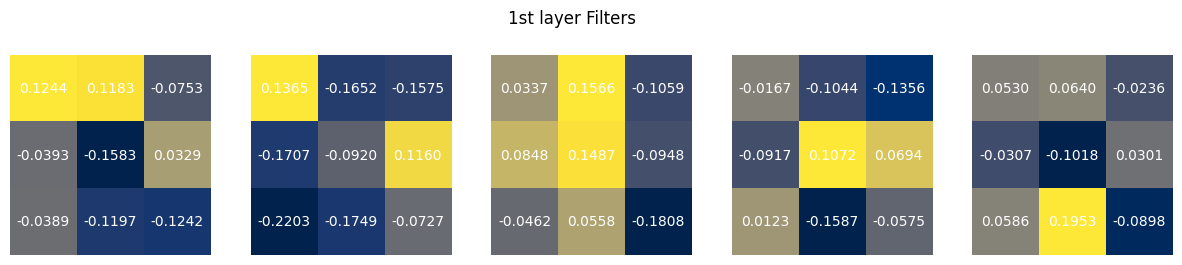

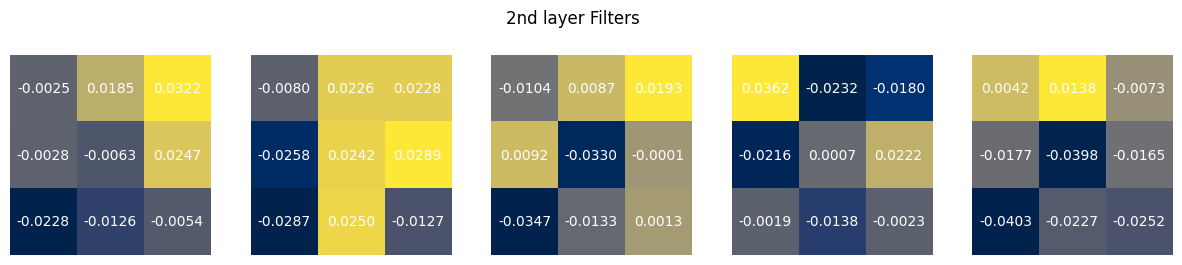

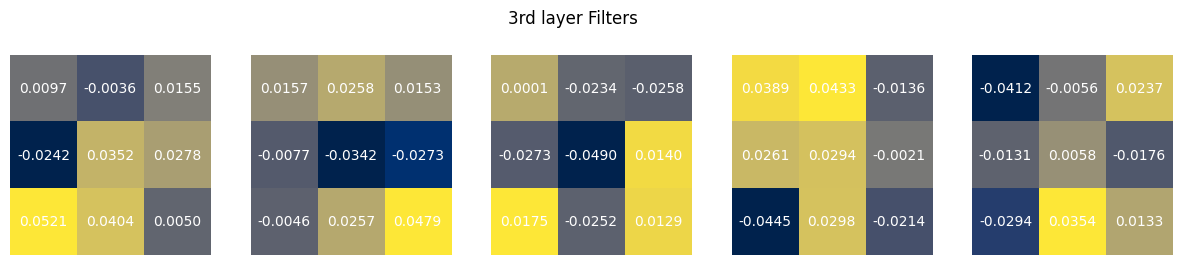

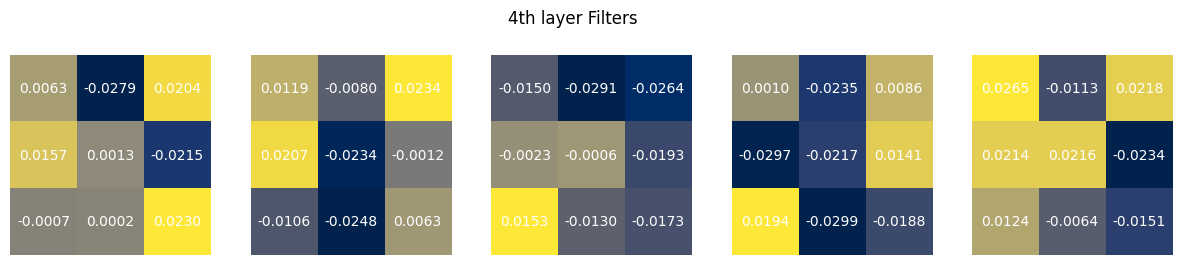

In [ ]:
import random

def show_filter(ax, weight):
    #filter has different depth -> select the first channel for simplicity
    filter_weight = weight[0, :, :]
    ax.imshow(filter_weight.cpu().numpy(), cmap='cividis')
    ax.axis('off')

    #print the weight at each boxes for readability.
    rows, cols = filter_weight.shape
    for i in range(rows):
        for j in range(cols):
            # format weight numbers to 4 decimal places & add text.
            text = f'{filter_weight[i, j].item():.4f}'
            ax.text(j, i, text, ha='center', va='center', color='white')

def select_from_layer(layer, title):
    # Randomly select 5 filters from each layer.
    filters = layer.weight.data   #extracting weights
    n_filters = filters.size(0)
    filter_id = random.sample(range(n_filters), 5) # select 5 randomly
    selected_filters = filters[filter_id, :, :, :]

    fig, axes = plt.subplots(1, 5, figsize=(15, 3))
    fig.suptitle(title)  # add title

    for i, ax in enumerate(axes.flat):
        show_filter(ax, selected_filters[i])

# Visualizing
select_from_layer(net.conv1_1, '1st layer Filters')
select_from_layer(net.conv1_2, '2nd layer Filters')
select_from_layer(net.conv2_1, '3rd layer Filters')
select_from_layer(net.conv3_1, '4th layer Filters')
plt.show()


# Distribution of filter weights(all) for each layer

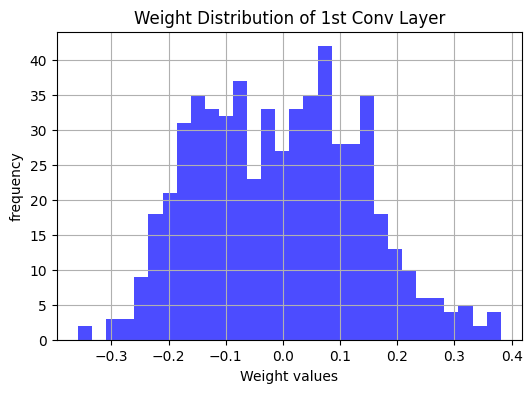

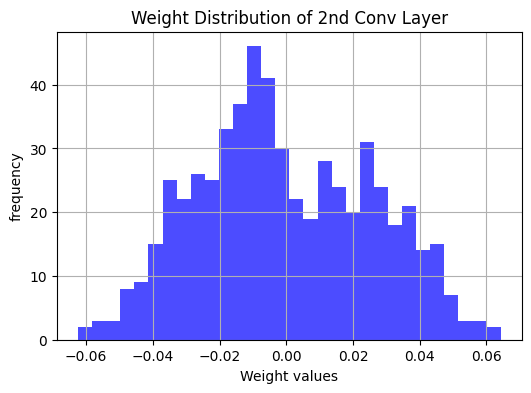

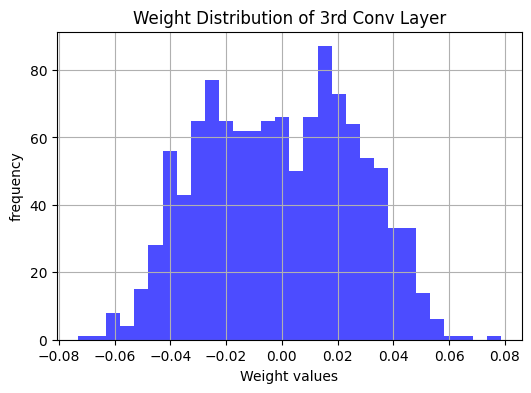

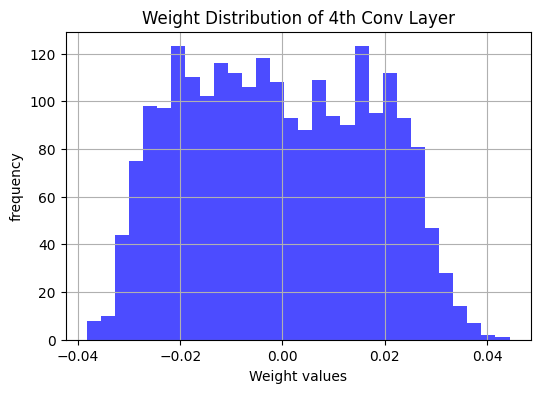

In [ ]:
def weight_dist(layer, layer_name):
    # Extracting the weights of the first channel(for convenience) of all filters
    filters = layer.weight.data
    first_channel_weights = filters[:, 0, :, :].flatten()  # Flatten the weights for histogram

    # Create histogram
    plt.figure(figsize=(6, 4))
    plt.hist(first_channel_weights.cpu().numpy(), bins=30, alpha=0.7, color='blue')
    plt.title(f'Weight Distribution of {layer_name}')
    plt.xlabel('Weight values')
    plt.ylabel("frequency")
    plt.grid(True)

weight_dist(net.conv1_1, '1st Conv Layer')
weight_dist(net.conv1_2, '2nd Conv Layer')
weight_dist(net.conv2_1, '3rd Conv Layer')
weight_dist(net.conv3_1, '4th Conv Layer')
plt.show()


## Analysis: In the first layer, the values are generally broadly distributed, but as we move to the fourth layer, there seems to be a tendency for the weight values to converge towards zero. Moreover, the range of weight values in each layer is slightly different. Observing the layers, we can see that the most frequently occurring values differ from layer to layer. Therefore, we can infer that each layer detects different features.


(PART 3) Improving the CNN model (10 points)
----------------
You are to enhance the accuracy of a baseline CNN model on the CIFAR-10 dataset through the implementation of advanced CNN architectures or techniques.

Implement and compare at least two of the following techniques to improve your baseline CNN model's performance on the CIFAR-10 dataset:

- Data Augmentation: Implement data augmentation techniques such as rotation, width shift, height shift, and horizontal flipping. Explain how these augmentations might help the model generalize better.
- Advanced CNN Architectures: Incorporate a more complex CNN architecture such as ResNet, Inception, or DenseNet. Describe the key architectural innovations of your chosen model and why they might be effective for this task.
- Regularization Techniques: Apply regularization (not dropout) or batch normalization to your model. Discuss how these techniques prevent the model from overfitting.
- Hyperparameter Tuning: Experiment with different learning rates, batch sizes, or optimizer types. Provide a brief analysis of how each parameter impacts model performance.





## Explanation of my method and Justification

My method uses ...


# Data Augmentation

## Data augmentation: method expanding training dataset by applying transformations(rotating, flipping, etc) to original data. helps introducing variability, reducing overfitting, and improves the generalization by training model to a various situations.

In [ ]:
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Randomly flip the images horizontally.
    transforms.RandomRotation(10),      # Random rotation by 10 degrees.
    transforms.RandomCrop(32, padding=4, padding_mode='reflect'),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2), # Random color jittering
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)) # Normalize the images with different numbers.
    #(referenced some other codes.(widely used numbers for cifar10))
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, #adjust batch size for stability at training
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=16, #adjust batch size for stability at training
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


# Advanced CNN Architecture(ResNet) + Batch Norm + Hyperparameter Tuning

### ResNet:   skip connection makes the network easier to train deeper networks without vanishing gradient problem. By passing the activation directly, ResNet can train on very deep neural networks, resulting in improved accuracy.


 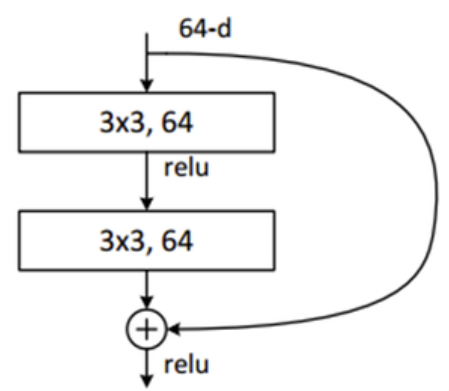

### Batch Norm: normalize the activations of each layer among mini-batches during training. It reduces the covariate shift, which stabilizes the training process, and also it allows for higher learning rates ->  helps prevent overfitting

### Hyperparameter tuning: adjusting hyperparmeters such as changing the number of epochs and changing the learning rate allows models to better converge to the (local/global) optimum of the loss function, which leads to improving accuracy and generalization on new data. alsoiIncreasing the batch size can improve the stability of training by reducing the noise in gradient estimates.


# First Trial (similar to part 1, but CNN with more conv blocks, batch norm and different learning rate with 50 epoch)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        # Layer 1
        self.conv1_1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
        self.batchnorm1_1 = nn.BatchNorm2d(64) #added batch norm
        self.conv1_2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
        self.batchnorm1_2 = nn.BatchNorm2d(64)
        self.dropout1 = nn.Dropout(0.5)
        self.pooling1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Layer 2
        self.conv2_1 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.batchnorm2_1 = nn.BatchNorm2d(128)
        self.conv2_2 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1) #added conv block at layer 2
        self.batchnorm2_2 = nn.BatchNorm2d(128)
        self.dropout2 = nn.Dropout(0.5)
        self.pooling2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Layer 3
        self.conv3_1 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.batchnorm3_1 = nn.BatchNorm2d(256)
        self.conv3_2 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1) # also added conv block at layer 3
        self.batchnorm3_2 = nn.BatchNorm2d(256)
        self.dropout3 = nn.Dropout(0.5)
        self.pooling3 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Flattening the output for the fully connected layers
        self.flatten = nn.Flatten()

        # Layer 4
        self.fc1 = nn.Linear(in_features=256*4*4, out_features=512)

        # Layer 5
        self.fc2 = nn.Linear(in_features=512, out_features=512)

        # Layer 6
        self.fc3 = nn.Linear(in_features=512, out_features=10)

    def forward(self, x):
        x = self.pooling1(self.dropout1(F.relu(self.batchnorm1_2(self.conv1_2(F.relu(self.batchnorm1_1(self.conv1_1(x))))))))
        x = self.pooling2(self.dropout2(F.relu(self.batchnorm2_2(self.conv2_2(F.relu(self.batchnorm2_1(self.conv2_1(x))))))))
        x = self.pooling3(self.dropout3(F.relu(self.batchnorm3_2(self.conv3_2(F.relu(self.batchnorm3_1(self.conv3_1(x))))))))
        x = self.flatten(x)

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        x = F.softmax(x, dim=1)

        return x

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net2 = Net()
net2.to(device) #change the device to GPU for faster learning

Net(
  (conv1_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm1_1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv1_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm1_2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (pooling1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm2_1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm2_2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (pooling2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3_1): Conv

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net2.parameters(), lr=0.005, momentum=0.9) #set learning rate to 0.005
#since batch normalization allows higher learning rate

I have adapted the given code to include early stopping.

It still outputs the loss every 2000 mini-batches, just as before.

In [ ]:
import numpy as np

#initializing for early stopping
best_loss = np.inf
patience = 4
trigger_times = 0

for epoch in range(50):  # loop over the dataset multiple times. You can increase if you want.

    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()

        if i%2000 == 1999:
            epoch_loss = running_loss / 2000
            print('[%d, %5d] loss: %.3f' %  (epoch + 1, i + 1, epoch_loss))
            running_loss = 0.0
            break

    # Early stopping condition checking
    if epoch_loss < best_loss:
        best_loss = epoch_loss
        trigger_times = 0
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("Early stopping")
            break


print('Finished Training')

[1,  2000] loss: 2.147
[2,  2000] loss: 2.070
[3,  2000] loss: 2.045
[4,  2000] loss: 2.015
[5,  2000] loss: 1.998
[6,  2000] loss: 1.983
[7,  2000] loss: 1.969
[8,  2000] loss: 1.958
[9,  2000] loss: 1.948
[10,  2000] loss: 1.952
[11,  2000] loss: 1.946
[12,  2000] loss: 1.933
[13,  2000] loss: 1.937
[14,  2000] loss: 1.923
[15,  2000] loss: 1.921
[16,  2000] loss: 1.934
[17,  2000] loss: 1.916
[18,  2000] loss: 1.913
[19,  2000] loss: 1.921
[20,  2000] loss: 1.932
[21,  2000] loss: 1.921
[22,  2000] loss: 1.923
Early stopping
Finished Training


In [ ]:
images = images.to(device) # to match the same device
outputs = net2(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   ship truck   dog  deer


accuracy checking

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 60 %



accuracy checking for each class labels


In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net2(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 74 %
Accuracy of   car : 88 %
Accuracy of  bird : 35 %
Accuracy of   cat : 35 %
Accuracy of  deer : 41 %
Accuracy of   dog : 55 %
Accuracy of  frog : 76 %
Accuracy of horse : 58 %
Accuracy of  ship : 65 %
Accuracy of truck : 80 %


### Analysis: I trained the model with a higher learning rate using batch normalization. The loss decreased more rapidly, which also improved the accuracy. Increasing the number of convolution blocks per layer to two has helped enhance the accuracy.

# Second Trial (Resnet + batchnorm with 50 epoch)

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ResidualBlock(nn.Module): #defining Residual block for resnet.
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResidualBlock, self).__init__()
        #first convolutional layer
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3,
                               stride=stride, padding=1, bias=False)
        #batch norm after convolution
        self.batchnorm1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        #second convolution layer
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3,
                               padding=1, bias=False)
        self.batchnorm2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample #downsampling if size doesn't match

    def forward(self, x): #forward pass
        residual = x
        #first conv layer
        out = self.conv1(x)
        out = self.batchnorm1(out)
        out = self.relu(out)
        #second conv layer
        out = self.conv2(out)
        out = self.batchnorm2(out)

        if self.downsample: #if downsampling is required (if sizes don't match together)
            residual = self.downsample(x)

        out += residual # add the residuals to the output.
        out = self.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=10):
        super(ResNet, self).__init__()
        self.in_channels = 64
        #initial convolutional layer.
        self.conv = nn.Conv2d(3, self.in_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.batchnorm = nn.BatchNorm2d(self.in_channels)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self.make_layer(block, 64, layers[0])
        self.layer2 = self.make_layer(block, 128, layers[1], 2)
        self.layer3 = self.make_layer(block, 256, layers[2], 2)
        self.layer4 = self.make_layer(block, 512, layers[3], 2)
        #Global average pooling (add average pooling Layer referring to other famous codes and ResNet architecture)
        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        #linear layer for classification
        self.fc = nn.Linear(512, num_classes)

    def make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        #if downsampling is required
        if (stride != 1) or (self.in_channels != out_channels):
            #defining downsampling method(layer)
            downsample = nn.Sequential(
                nn.Conv2d(self.in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels))
        layers = []
        #first block of layer
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels
        # following blocks
        for i in range(1, blocks):
            layers.append(block(out_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x): # forward pass of entire ResNet.
        out = self.conv(x)
        out = self.batchnorm(out)
        out = self.relu(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.avg_pool(out)
        out = out.view(out.size(0), -1) #flattening the output
        out = self.fc(out)
        return out

# Define the ResNet with 3 blocks of each size.
resnet = ResNet(ResidualBlock, [3, 4, 6, 3])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #change the device to GPU for faster learning
print(resnet)
resnet.to(device)

ResNet(
  (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (batchnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batchnorm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batchnorm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batchnorm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(

ResNet(
  (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (batchnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batchnorm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batchnorm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batchnorm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet.parameters(), lr=0.001, momentum=0.9) #optimizer = SGD, learning rate = 0.001

In [ ]:
import numpy as np

#initializing for early stopping
best_loss = np.inf
patience = 3
trigger_times = 0

for epoch in range(50):  # loop over the dataset multiple times. You can increase if you want.

    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i%2000 == 1999:
            epoch_loss = running_loss / 2000
            print('[%d, %5d] loss: %.3f' %  (epoch + 1, i + 1, epoch_loss))
            running_loss = 0.0
            break

     #Early stopping condition checking
    if epoch_loss < best_loss:
        best_loss = epoch_loss
        trigger_times = 0
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("Early stopping")
            break


print('Finished Training')

[1,  2000] loss: 1.713
[2,  2000] loss: 1.279
[3,  2000] loss: 1.046
[4,  2000] loss: 0.886
[5,  2000] loss: 0.785
[6,  2000] loss: 0.713
[7,  2000] loss: 0.657
[8,  2000] loss: 0.610
[9,  2000] loss: 0.568
[10,  2000] loss: 0.544
[11,  2000] loss: 0.511
[12,  2000] loss: 0.489
[13,  2000] loss: 0.463
[14,  2000] loss: 0.436
[15,  2000] loss: 0.425
[16,  2000] loss: 0.413
[17,  2000] loss: 0.391
[18,  2000] loss: 0.378
[19,  2000] loss: 0.365
[20,  2000] loss: 0.350
[21,  2000] loss: 0.335
[22,  2000] loss: 0.332
[23,  2000] loss: 0.319
[24,  2000] loss: 0.305
[25,  2000] loss: 0.301
[26,  2000] loss: 0.289
[27,  2000] loss: 0.284
[28,  2000] loss: 0.280
[29,  2000] loss: 0.267
[30,  2000] loss: 0.258
[31,  2000] loss: 0.248
[32,  2000] loss: 0.245
[33,  2000] loss: 0.234
[34,  2000] loss: 0.230
[35,  2000] loss: 0.223
[36,  2000] loss: 0.219
[37,  2000] loss: 0.215
[38,  2000] loss: 0.207
[39,  2000] loss: 0.201
[40,  2000] loss: 0.197
[41,  2000] loss: 0.194
[42,  2000] loss: 0.189
[

### set the epochs to 50, and the loss decreased steadily without any sudden increases, allowed to complete the training without early stopping.

In [ ]:
images = images.to(device)
outputs = resnet(images)


In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  horse   dog  ship plane


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = resnet(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 91 %


In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = resnet(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 93 %
Accuracy of   car : 95 %
Accuracy of  bird : 85 %
Accuracy of   cat : 86 %
Accuracy of  deer : 92 %
Accuracy of   dog : 85 %
Accuracy of  frog : 94 %
Accuracy of horse : 94 %
Accuracy of  ship : 94 %
Accuracy of truck : 96 %


### The accuracy has significantly improved. Due to the characteristics of the ResNet structure, which mitigates the vanishing gradient problem, training becomes more manageable, leading to enhanced performance.

# Third Trial (Resnet + batchnorm + lr(0.005) with 50 epoch)



In [16]:
resnet2 = ResNet(ResidualBlock, [3, 4, 6, 3])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet2.to(device)

ResNet(
  (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (batchnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batchnorm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batchnorm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batchnorm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(

different learning rate

In [17]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet2.parameters(), lr=0.005, momentum=0.9)
#increased learning rate since batch normalization can allow higher learning rate.

In [18]:
import numpy as np

#initializing for early stopping
best_loss = np.inf
patience = 3
trigger_times = 0

for epoch in range(50):  # loop over the dataset multiple times. You can increase if you want.

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = resnet2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i%2000 == 1999:
            epoch_loss = running_loss / 2000
            print('[%d, %5d] loss: %.3f' %  (epoch + 1, i + 1, epoch_loss))
            running_loss = 0.0
            break

    #Early Stopping condition checking
    if epoch_loss < best_loss:
        best_loss = epoch_loss
        trigger_times = 0
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("Early stopping")
            break


print('Finished Training')

[1,  2000] loss: 2.278
[2,  2000] loss: 1.871
[3,  2000] loss: 1.713
[4,  2000] loss: 1.606
[5,  2000] loss: 1.453
[6,  2000] loss: 1.331
[7,  2000] loss: 1.230
[8,  2000] loss: 1.130
[9,  2000] loss: 1.041
[10,  2000] loss: 0.995
[11,  2000] loss: 0.919
[12,  2000] loss: 0.846
[13,  2000] loss: 0.804
[14,  2000] loss: 0.773
[15,  2000] loss: 0.744
[16,  2000] loss: 0.691
[17,  2000] loss: 0.653
[18,  2000] loss: 0.615
[19,  2000] loss: 0.619
[20,  2000] loss: 0.581
[21,  2000] loss: 0.553
[22,  2000] loss: 0.534
[23,  2000] loss: 0.507
[24,  2000] loss: 0.469
[25,  2000] loss: 0.473
[26,  2000] loss: 0.446
[27,  2000] loss: 0.446
[28,  2000] loss: 0.407
[29,  2000] loss: 0.404
[30,  2000] loss: 0.397
[31,  2000] loss: 0.397
[32,  2000] loss: 0.358
[33,  2000] loss: 0.335
[34,  2000] loss: 0.324
[35,  2000] loss: 0.322
[36,  2000] loss: 0.311
[37,  2000] loss: 0.282
[38,  2000] loss: 0.279
[39,  2000] loss: 0.273
[40,  2000] loss: 0.246
[41,  2000] loss: 0.256
[42,  2000] loss: 0.233
[

In [19]:
images = images.to(device)
outputs = resnet2(images)

In [20]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   frog   dog   car horse


In [21]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = resnet2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 82 %


In [22]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = resnet2(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 87 %
Accuracy of   car : 94 %
Accuracy of  bird : 77 %
Accuracy of   cat : 66 %
Accuracy of  deer : 74 %
Accuracy of   dog : 76 %
Accuracy of  frog : 86 %
Accuracy of horse : 86 %
Accuracy of  ship : 85 %
Accuracy of truck : 85 %


### I expected that a larger learning rate would lead to faster convergence compared to the model with lr=0.001. However, the actual results were contrary to expectations. A learning rate of 0.005 turned out to be too large, which did not significantly help convergence. Additionally, the loss value in the first epoch was much smaller for the model with a learning rate of 0.001.